In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Intestine_Intestine_HCLFetalIntestine1"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/db_v1/Intestine_Intestine_HCLFetalIntestine1/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


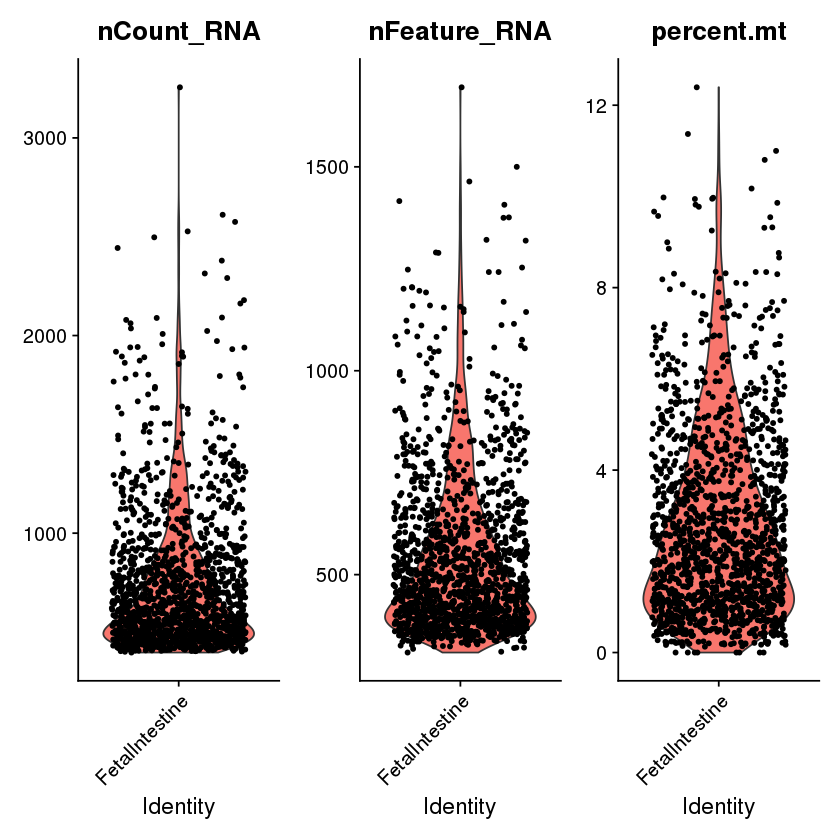

In [32]:
# Pre-processing
min.cells = 10
min.features = 10
nFeature_RNA_range = c(min.features, 800)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [19]:
percent.mt.thre = 8
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [33]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 10111 by 1448

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1448 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 56 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10111 genes



  |======================================================================| 100%


Computing corrected count matrix for 10111 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 53.05419 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  LGALS1, SPARC, COL3A1, COL1A1, STMN1, TUBA1B, VIM, COL1A2, TUBA1A, TUBB 
	   ACTA2, ID3, HMGN2, DCN, CNN3, TMSB4X, HSPB6, H2AFZ, HMGB2, NUSAP1 
	   HSPB1, TMSB10, PTTG1, PTN, FSTL1, SOX4, KPNA2, LUM, CALD1, MFAP4 
Negative:  APOA1, FTL, FABP1, RBP2, TTR, GSTA1, FTLP3, SERPINA1, ANXA13, SEPP1 
	   AFP, RPL34, CTSA, VTN, LGALS3, FABP2, FTH1, TDP2, RPS18, LGALS2 
	   OAT, RPS27, APOA4, SLC25A5, GSTA2, SLC26A3, APOA2, FOLH1, SMIM24, APOC3 
PC_ 2 
Positive:  TMSB4X, CD74, HLA-DRA, B2M, HLA-DRB6, HLA-DPA1, LCP1, AIF1, HLA-DPB1, HLA-DRB1 
	   ARHGDIB, TMSB4XP4, CST3, HLA-DQB1, PLVAP, GMFG, HLA-DRB5, CLDN5, HLA-DMA, LSP1 
	   HLA-DMB, ABI3, ARPC1B, APLNR, MPEG1, CPVL, PTPRC, CD36, CDH5, KDR 
Negative:  GAP43, STMN2, CALM2, NREP, MLLT11, TAGLN3, TUBA1A, TUBB2B, PENK, TMSB15A 
	   STMN4, NEFL, COL3A1, STMN1, MAB21L1, MAP1B, MEG3, ETV1, GRP, LINC00682 
	   COL1A1, ACTA2, LUM, BEX3, ELAVL4, COL1A2, HOXB5, GDI1, CRABP1, INA 
PC_ 3 
Positive:  PLVAP, CLDN5, APLNR, KDR, CALCRL, ESAM

png 
  2

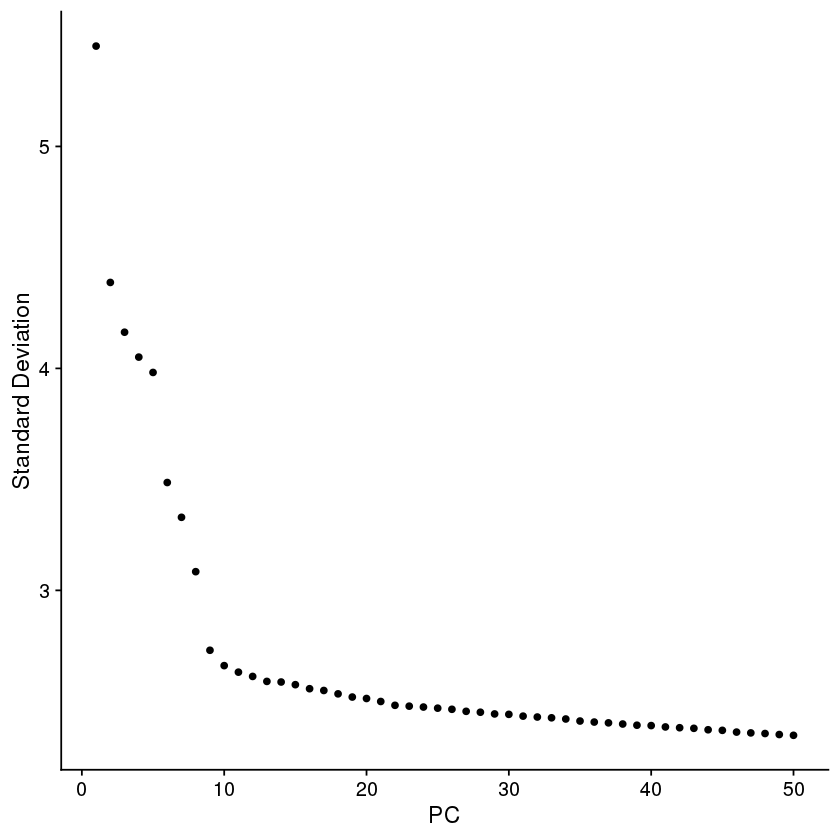

In [38]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [39]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [41]:
dataobj <- FindClusters(dataobj, resolution = 1.05, n.start = 10)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1448
Number of edges: 81593

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6420
Number of communities: 12
Elapsed time: 0 seconds


ARI 
0.4013701

In [42]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

16:23:06 UMAP embedding parameters a = 0.9922 b = 1.112

16:23:06 Read 1448 rows and found 30 numeric columns

16:23:06 Using Annoy for neighbor search, n_neighbors = 30

16:23:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:23:06 Writing NN index file to temp file /tmp/RtmpgesZg4/fileb41574fb29ab

16:23:06 Searching Annoy index using 1 thread, search_k = 3000

16:23:07 Annoy recall = 100%

16:23:07 Commencing smooth kNN distance calibration using 1 thread

16:23:08 Initializing from normalized Laplacian + noise

16:23:08 Commencing optimization for 500 epochs, with 60098 positive edges

16:23:14 Optimization finished



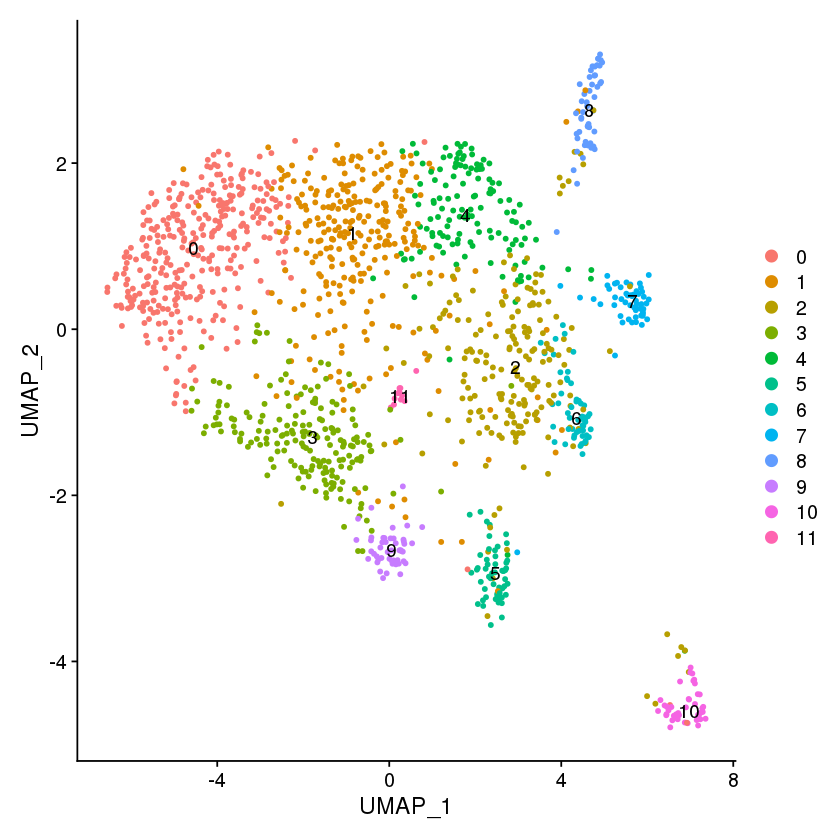

In [43]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

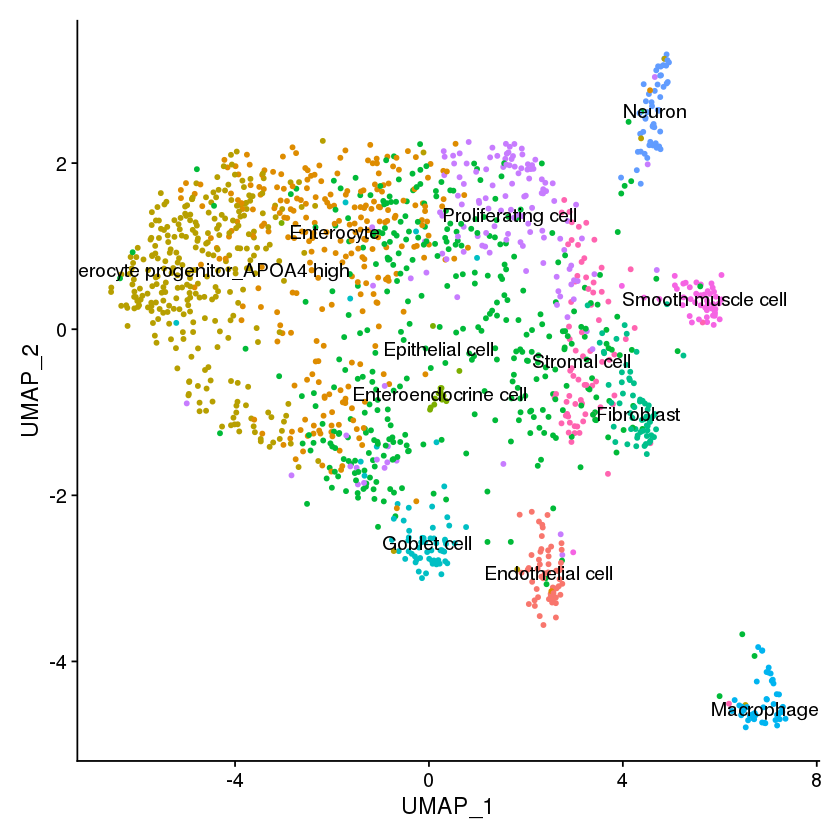

In [44]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [4]:
new.cluster.ids <- c("Intestine-Epithelial tissue-Enterocyte progenitor-APOA1", 
                     "Intestine-Epithelial tissue-Enterocyte-RPS18", 
                     "Intestine-Connective tissue-Stromal cell-COL3A1", 
                     "Intestine-Epithelial tissue-Enterocyte progenitor-TPT1",
                     "Intestine-Connective tissue-Proliferating T cell-UBE2C", 
                     "Intestine-Epithelial tissue-Endothelial cell-CD93", 
                     "Intestine-Connective tissue-Fibroblast-LUM", 
                     "Intestine-Muscle tissue-Smooth muscle cell-CNN1",
                     "Intestine-Nerve tissue-Neuron-STMN2",
                     "Intestine-Epithelial tissue-Goblet cell-MUC2",
                     'Intestine-Connective tissue-Macrophage-C1QA',
                     'Intestine-Epithelial tissue-Endocrine cell-GC')

In [21]:
subset(dataobj.markers,V6=='4')

,V1,V2,V3,V4,V5,V6,V7
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
105,4.1551787687726e-67,0.481103236485486,0.523,0.055,4.20130125310598e-63,4,UBE2C
106,4.16538600755244e-56,0.549660441395695,0.545,0.081,4.21162179223627e-52,4,CCNB1
107,6.50904413286986e-55,0.513159860485895,0.591,0.099,6.58129452274471e-51,4,PTTG1
108,1.0378503187461e-51,0.717019729784716,0.636,0.125,1.04937045728418e-47,4,H2AFZ
109,9.93407997181853e-49,0.302462582680684,0.356,0.033,1.00443482595057e-44,4,CDC20
110,1.34339692263591e-48,0.423891741185525,0.47,0.066,1.35830862847717e-44,4,TOP2A
111,2.5243146191081e-48,0.453953357438511,0.508,0.079,2.5523345113802e-44,4,NUSAP1
112,3.70649123107843e-44,0.469400830519194,0.621,0.138,3.7476332837434e-40,4,HMGB2
113,1.17922093716017e-40,0.315618315404891,0.326,0.035,1.19231028956265e-36,4,CCNB2


In [6]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [67]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

16:54:21 UMAP embedding parameters a = 0.9922 b = 1.112

16:54:21 Read 1448 rows and found 30 numeric columns

16:54:21 Using Annoy for neighbor search, n_neighbors = 30

16:54:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:54:22 Writing NN index file to temp file /tmp/RtmpgesZg4/fileb4151ad9921e

16:54:22 Searching Annoy index using 1 thread, search_k = 3000

16:54:22 Annoy recall = 100%

16:54:23 Commencing smooth kNN distance calibration using 1 thread

16:54:23 Initializing from normalized Laplacian + noise

16:54:23 Commencing optimization for 500 epochs, with 60098 positive edges

16:54:29 Optimization finished



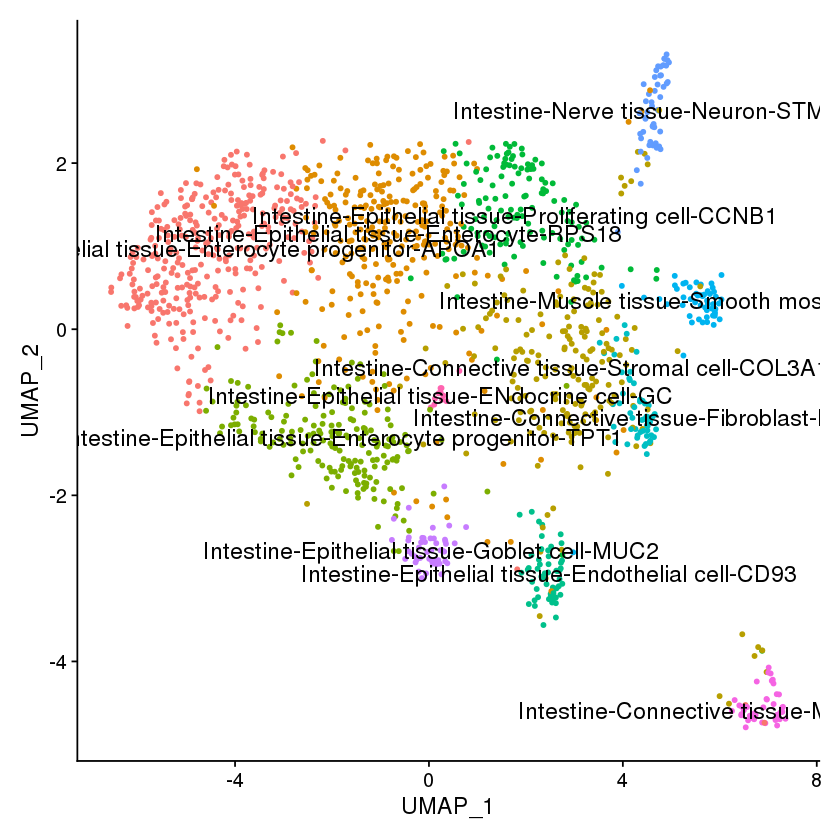

In [68]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [45]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [19]:
dataobj.markers = read.table(file = paste0(datasetName,".seurat.markers.txt"), sep = "\t")

In [14]:
colnames(dataobj.markers) = dataobj.markers[1,]

In [69]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [7]:
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [5]:
dataobj.dbupload_v1 <- readRDS(paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [7]:
dataobj.dbupload_v1$hcad_name<- sub("ENdocrine cell","Endocrine cell",dataobj.dbupload_v1$hcad_name)
unique(dataobj.dbupload_v1[['hcad_name']])

,hcad_name
,<chr>
FetalIntestine_1.AAAACGACCTGATATTGT,Intestine-Epithelial tissue-Enterocyte progenitor-APOA1
FetalIntestine_1.AAAACGAGGACTCTGAAA,Intestine-Epithelial tissue-Enterocyte-RPS18
FetalIntestine_1.AAAACGATCAACACCTGA,Intestine-Epithelial tissue-Enterocyte progenitor-TPT1
FetalIntestine_1.AAAACGGAGGAGGCCCTC,Intestine-Nerve tissue-Neuron-STMN2
FetalIntestine_1.AAAACGTAGTCGCTGAAA,Intestine-Connective tissue-Stromal cell-COL3A1
FetalIntestine_1.AAAGTTAGCGAGATGCTT,Intestine-Connective tissue-Macrophage-C1QA
FetalIntestine_1.AAAGTTTAGTCGCTCGCA,Intestine-Epithelial tissue-Proliferating cell-CCNB1
FetalIntestine_1.AACCTAAACGCCCCTAGA,Intestine-Epithelial tissue-Endothelial cell-CD93
FetalIntestine_1.AACCTAACCTGATAGTCG,Intestine-Muscle tissue-Smooth muscle cell-CNN1


In [10]:
dataobj.dbupload_v1$cell_type<- sub("ENdocrine cell","Endocrine cell",dataobj.dbupload_v1$cell_type)
unique(dataobj.dbupload_v1[['cell_type']])

,cell_type
,<chr>
FetalIntestine_1.AAAACGACCTGATATTGT,Enterocyte progenitor
FetalIntestine_1.AAAACGAGGACTCTGAAA,Enterocyte
FetalIntestine_1.AAAACGGAGGAGGCCCTC,Neuron
FetalIntestine_1.AAAACGTAGTCGCTGAAA,Stromal cell
FetalIntestine_1.AAAGTTAGCGAGATGCTT,Macrophage
FetalIntestine_1.AAAGTTTAGTCGCTCGCA,Proliferating cell
FetalIntestine_1.AACCTAAACGCCCCTAGA,Endothelial cell
FetalIntestine_1.AACCTAACCTGATAGTCG,Smooth muscle cell
FetalIntestine_1.AACGCCCCGACGCGTATT,Goblet cell


In [11]:
saveRDS(dataobj.dbupload_v1, file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [3]:
dataobj.dbupload_v1 = readRDS(file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))